In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
hdulist = fits.open('./data/gll_iem_v02_P6_V11_DIFFUSE.fit')

In [2]:
hdulist.info()

Filename: ./data/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


#### There are 2 HDU's

In [3]:
hdu = hdulist[0]

In [4]:
data = hdu.header

In [5]:
[data[2], data[23], data[24], data[-5], data[-2]] 

[3, 'photon energy', 'MeV', 'GLAST', 'MICHELSON']

In [6]:
img_data = hdu.data
Max = np.max(img_data[0])
Min = np.min(img_data[0])
Std = np.std(img_data[0])
print(Min)
print(Max)
print(Std)

7.027717e-08
4.5921523e-05
1.3843595e-06


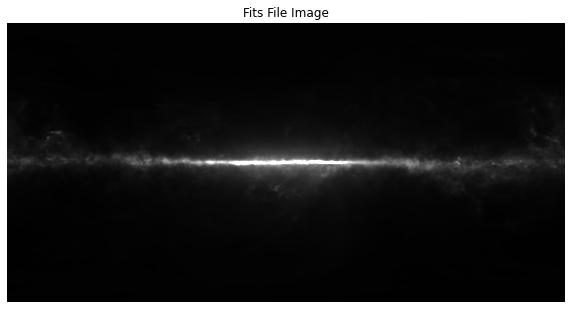

In [42]:
fig = plt.figure()
fig.set_size_inches(10,15)
plt.imshow(img_data[1], vmin=Min, vmax=Max, cmap='gray')
plt.axis('off')
plt.title('Fits File Image')
plt.show()

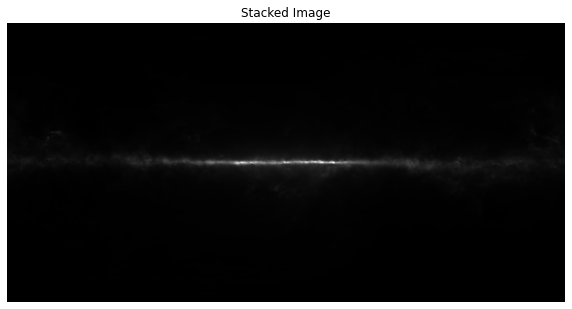

In [40]:
Max_arr = [np.max(img_data[i]) for i in range(4, 30, 5)]
Min_arr = [np.min(img_data[i]) for i in range(4, 30, 5)]
Std_arr = [np.std(img_data[i]) for i in range(4, 30, 5)]
stack = 0
for i in range(4, 30, 5):
    stack+=img_data[i]
Max = np.max(Max_arr)
Min = np.min(Min_arr)
Std = np.std(Std_arr)
fig = plt.figure()
fig.set_size_inches(10, 15)
plt.imshow(stack, vmin=Min, vmax=Max, cmap='gray')
plt.axis('off')
plt.title('Stacked Image')
plt.show()

In [32]:
def Altitude(coordinates, time):
    iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    time = Time(time) - 5.5*u.hour
    tot_time = Time('2021-7-11 22:00:00') + u.min*np.arange(0, 60*12)
    coords_h = coordinates.transform_to(AltAz(obstime=tot_time, location=iitm))
    plt.plot(coords_h.alt)
    plt.title('Altitude over 12 Hours')
    plt.ylabel('Altitude (degrees)')
    plt.xlabel('Minutes passed')
    plt.show()